In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [3]:
# Loading the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Converting to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

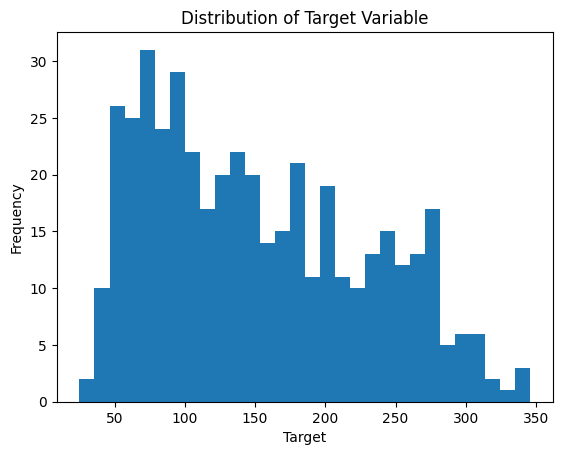

In [4]:
# Summary statistics
print(df.describe())

# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Distribution of target variable
plt.hist(df['target'], bins=30)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Creating Models
models = [
    ("Linear Regression", make_pipeline(StandardScaler(), LinearRegression())),
    ("Polynomial Regression (degree=2)", make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())),
    ("Decision Tree (max_depth=5)", DecisionTreeRegressor(max_depth=5)),
    ("Decision Tree (max_depth=10)", DecisionTreeRegressor(max_depth=10)),
    ("kNN (k=5)", KNeighborsRegressor(n_neighbors=5)),
    ("kNN (k=10)", KNeighborsRegressor(n_neighbors=10))
]

# Cross-Validation
results = []
for name, model in models:
    cv_scores = cross_validate(model, X_train, y_train, scoring=('r2', 'neg_mean_absolute_error'), cv=5)
    mape_scores = np.abs((cv_scores['test_neg_mean_absolute_error'] / y_train.mean()) * 100)
    results.append((name, cv_scores['test_r2'].mean(), cv_scores['test_r2'].std(), -cv_scores['test_neg_mean_absolute_error'].mean(), cv_scores['test_neg_mean_absolute_error'].std(), mape_scores.mean(), mape_scores.std()))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'R-Squared (Mean)', 'R-Squared (Std)', 'MAE (Mean)', 'MAE (Std)', 'MAPE (Mean)', 'MAPE (Std)'])
print(results_df)

                              Model  R-Squared (Mean)  R-Squared (Std)   
0                 Linear Regression          0.449256         0.144095  \
1  Polynomial Regression (degree=2)          0.301238         0.140777   
2       Decision Tree (max_depth=5)          0.186767         0.200123   
3      Decision Tree (max_depth=10)         -0.058907         0.213039   
4                         kNN (k=5)          0.317221         0.104040   
5                        kNN (k=10)          0.370056         0.108183   

   MAE (Mean)  MAE (Std)  MAPE (Mean)  MAPE (Std)  
0   45.543329   3.114136    29.624270    2.025632  
1   50.762927   3.607252    33.019427    2.346385  
2   54.215434   3.029972    35.265157    1.970886  
3   60.873131   0.326031    39.595746    0.212071  
4   50.199461   2.613718    32.652914    1.700128  
5   48.313501   2.866698    31.426166    1.864682  


In [15]:


# Fit the best model on the entire training data
best_model = DecisionTreeRegressor(max_depth=10)
best_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
print("Test R-Squared:", r2)
print("Test MAPE:", mape)
print("Test MAE:", mae)



Test R-Squared: 0.05706090263069319
Test MAPE: 46.56804874706315
Test MAE: 55.89778685733741


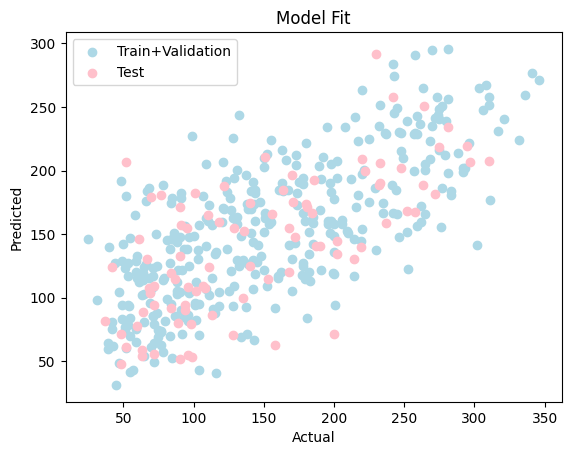

In [25]:
# Plotting
plt.scatter(y_train, best_model.predict(X_train), label='Train+Validation', color='lightblue')
plt.scatter(y_test, y_pred, label='Test', color='pink')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Model Fit')
plt.show()